### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [2]:
# 1-1. 데이터셋 로드 및 상위 5개 데이터 확인
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df.sort_values('OrderID').head(5)

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


In [4]:
# 1-2. 결측값 확인 및 처리
# df.isna().sum()  # DiscountRate 결측치 확인
# mean_dr = df['DiscountRate'].mean()
# df['DiscountRate'].fillna(mean_dr, inplace=True)  # 평균값으로 결측값 대체
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  120 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB


In [5]:
# 1-3. 각 열의 데이터타입 확인 및 Orderdate 형식 변환
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [6]:
# 2-1
df['TotalRevenue'] = df['Quantity'] * df['Price']

OrderDate
2023-10-31     392000
2023-11-30     995000
2023-12-31     920000
2024-01-31     905000
2024-02-29     565000
2024-03-31     703000
2024-04-30     288000
2024-05-31     930000
2024-06-30    1365000
2024-07-31     712000
2024-08-31     635000
2024-09-30     319000
2024-10-31     190000
Freq: ME, Name: TotalRevenue, dtype: int64


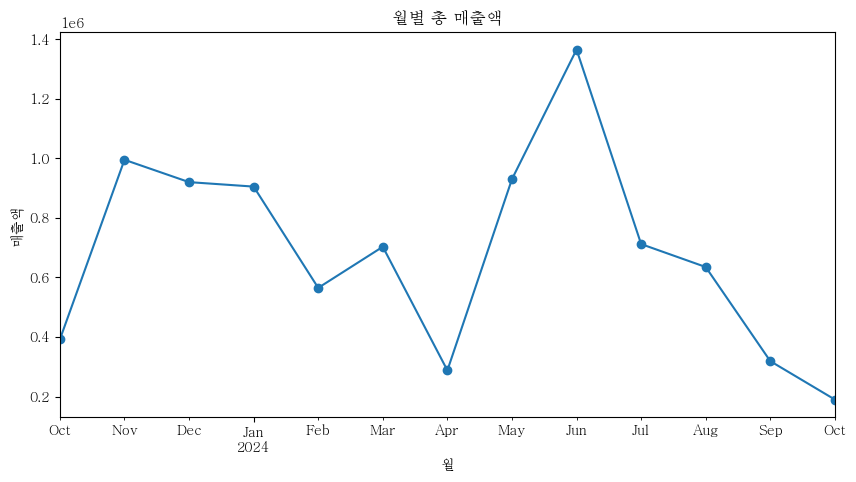

In [7]:
# 2-2
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\batang.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# 월별 총 매출액 집계
df.set_index('OrderDate', inplace=True)
monthly_df = df['TotalRevenue'].resample('ME').sum()
print(monthly_df)

# 시각화
plt.figure(figsize=(10, 5))
monthly_df.plot(marker='o')
plt.title("월별 총 매출액")
plt.xlabel('월')
plt.ylabel('매출액')
plt.show()

In [8]:
# 2-3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리
df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False).head(3)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

In [9]:
# 2-4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가
df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [10]:
# 3-1
df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

In [11]:
# 3-2
df.groupby('CustomerID')['OrderID'].nunique().sort_values(ascending=False).head(5)

CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
Name: OrderID, dtype: int64

In [12]:
# 3-3
# 연령대 생성
df['Birthdate'] = pd.to_datetime(df['Birthdate'])
df['Age'] = 2026 - df['Birthdate'].dt.year
df['AgeGroup'] = (df['Age'] // 10 * 10)

# 각 연령대별로 가장 많이 구매한 상품의 카테고리
group = df.groupby(['AgeGroup', 'Category']).size().reset_index(name='Count')
group_sort = group.sort_values(['AgeGroup', 'Count'], ascending=[True, False]).drop_duplicates('AgeGroup')
print(group_sort[['AgeGroup', 'Category']])

    AgeGroup     Category
0         20       Beauty
10        30         Food
13        40        Books
21        50  Electronics
27        60  Electronics


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [13]:
# 4-1
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64

In [14]:
# 4-2
group = df.groupby(['Category', 'Product'])['Quantity'].sum().reset_index()
group_sort = group.sort_values(['Category', 'Quantity'], ascending=[True, False]).drop_duplicates('Category')
print(group_sort[['Category', 'Product', 'Quantity']])

       Category Product  Quantity
1        Beauty     립스틱        22
7         Books      소설        21
10     Clothing      셔츠        25
14  Electronics     노트북        15
23         Food      커피        20
25       Sports    요가매트        12


In [15]:
# 4-3
df.groupby('Product')['Quantity'].mean().sort_values(ascending=False).head(3)

Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

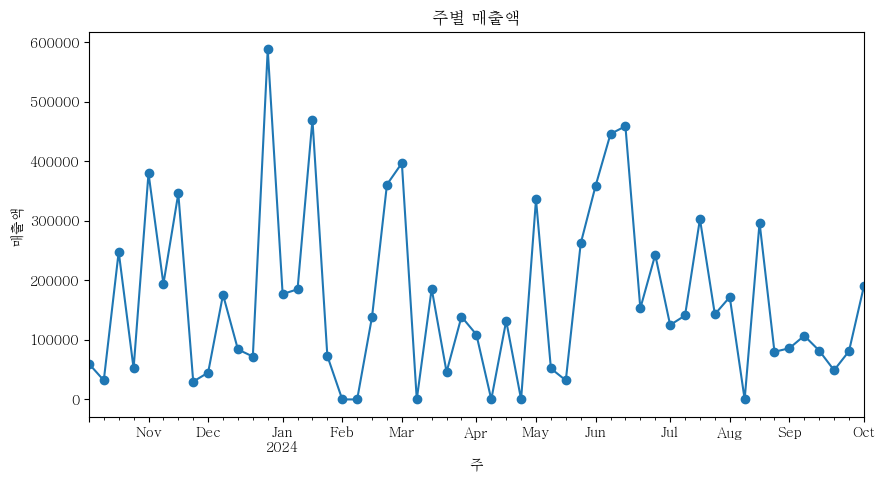

In [16]:
# 5-1
# 주별 매출액 계산
week_revenue = df['TotalRevenue'].resample('W').sum()

# 시각화
plt.figure(figsize=(10, 5))
week_revenue.plot(marker='o')
plt.title("주별 매출액")
plt.xlabel("주")
plt.ylabel("매출액")

plt.show()

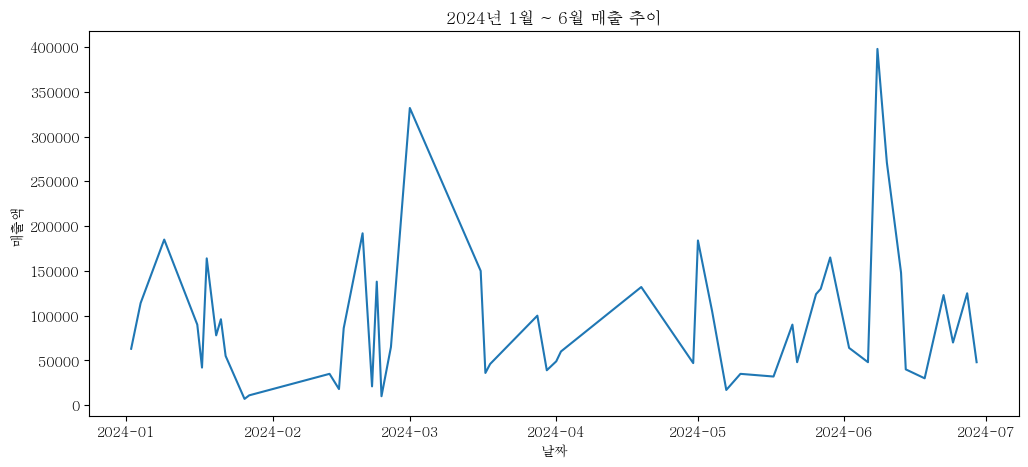

In [29]:
# 5-2
# 일별 매출 계산
daily_revenue = (
    df[df['OrderDate'].between('2024-01-01', '2024-06-30')]
    .groupby(df['OrderDate'].dt.date)['TotalRevenue']
    .sum()
)

# 시각화
plt.figure(figsize=(12, 5))
daily_revenue.plot()
plt.title("2024년 1월 ~ 6월 매출 추이")
plt.xlabel("날짜")
plt.ylabel("매출액")

plt.show()

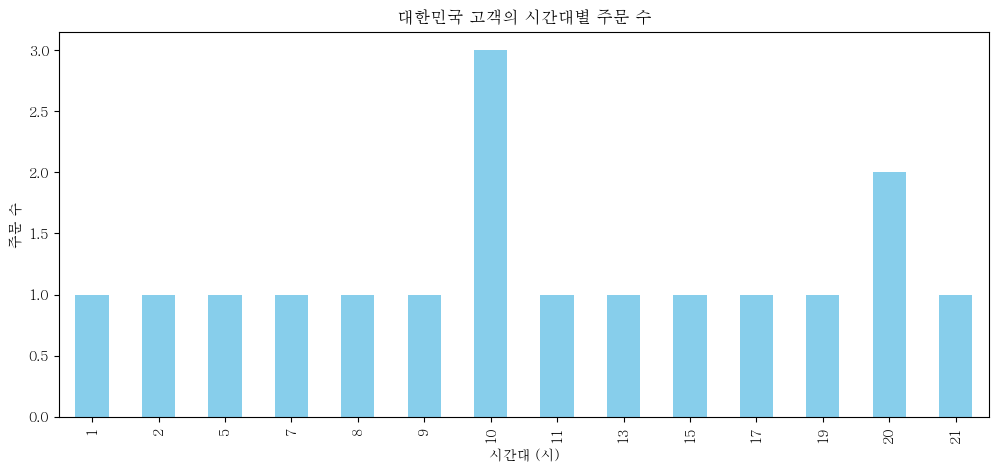

In [35]:
# 5-3
# '대한민국'에서 분석
df_country = df[df['Country'] == '대한민국'].copy()

# 주문 시간 컬럼 생성
df_country['OrderHour'] = df_country['OrderDate'].dt.hour

# 시간대별 주문 수
order_hour_counts = df_country['OrderHour'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 5))
order_hour_counts.plot(kind='bar', color='skyblue')
plt.title(f"대한민국 고객의 시간대별 주문 수")
plt.xlabel("시간대 (시)")
plt.ylabel("주문 수")

plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [36]:
# 6-1
# 고객별 주문 횟수
order_counts = df.groupby('CustomerID')['OrderID'].nunique()

# 재구매자 수 (2번 이상 주문한 사람)
rebuyers = order_counts[order_counts >= 2].count()

# 전체 고객 수
total_customers = order_counts.count()

# 재구매율 계산
print(rebuyers / total_customers * 100)

8.108108108108109


In [37]:
# 6-2
# 할인 적용된 실제 매출액 컬럼 생성
df['DiscountedRevenue'] = df['Quantity'] * df['Price'] * (1 - df['DiscountRate'])

# 카테고리별 평균 할인율과 총 매출액 계산
discount_stats = df.groupby('Category').agg(
    AvgDiscountRate=('DiscountRate', 'mean'),
    TotalDiscountedRevenue=('DiscountedRevenue', 'sum')
).sort_values(by='AvgDiscountRate', ascending=False)

print(discount_stats)

             AvgDiscountRate  TotalDiscountedRevenue
Category                                            
Beauty              0.186522            1.209380e+06
Sports              0.179444            8.666800e+05
Electronics         0.175789            1.453730e+06
Food                0.174099            1.610223e+06
Books               0.170000            1.166780e+06
Clothing            0.154000            1.059820e+06
